In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.DataFrame()

for i in range(6):
    a = np.load('./results/exp_{}_q_value_estimate_each_period.npy'.format(i+1))
    df[i] = a[:30000].tolist()

In [71]:
median = df.median(axis=1).tolist()
minimum = df.min(axis=1).tolist()
maximum = df.max(axis=1).tolist()

In [72]:
l = [minimum[i]*0.9 + maximum[i]*0.1 for i in range(len(minimum))]
h = [minimum[i]*0.1 + maximum[i]*0.9 for i in range(len(maximum))]

In [73]:
tmp = pd.DataFrame()
tmp['m'] = median
tmp['l'] = l
tmp['h'] = h

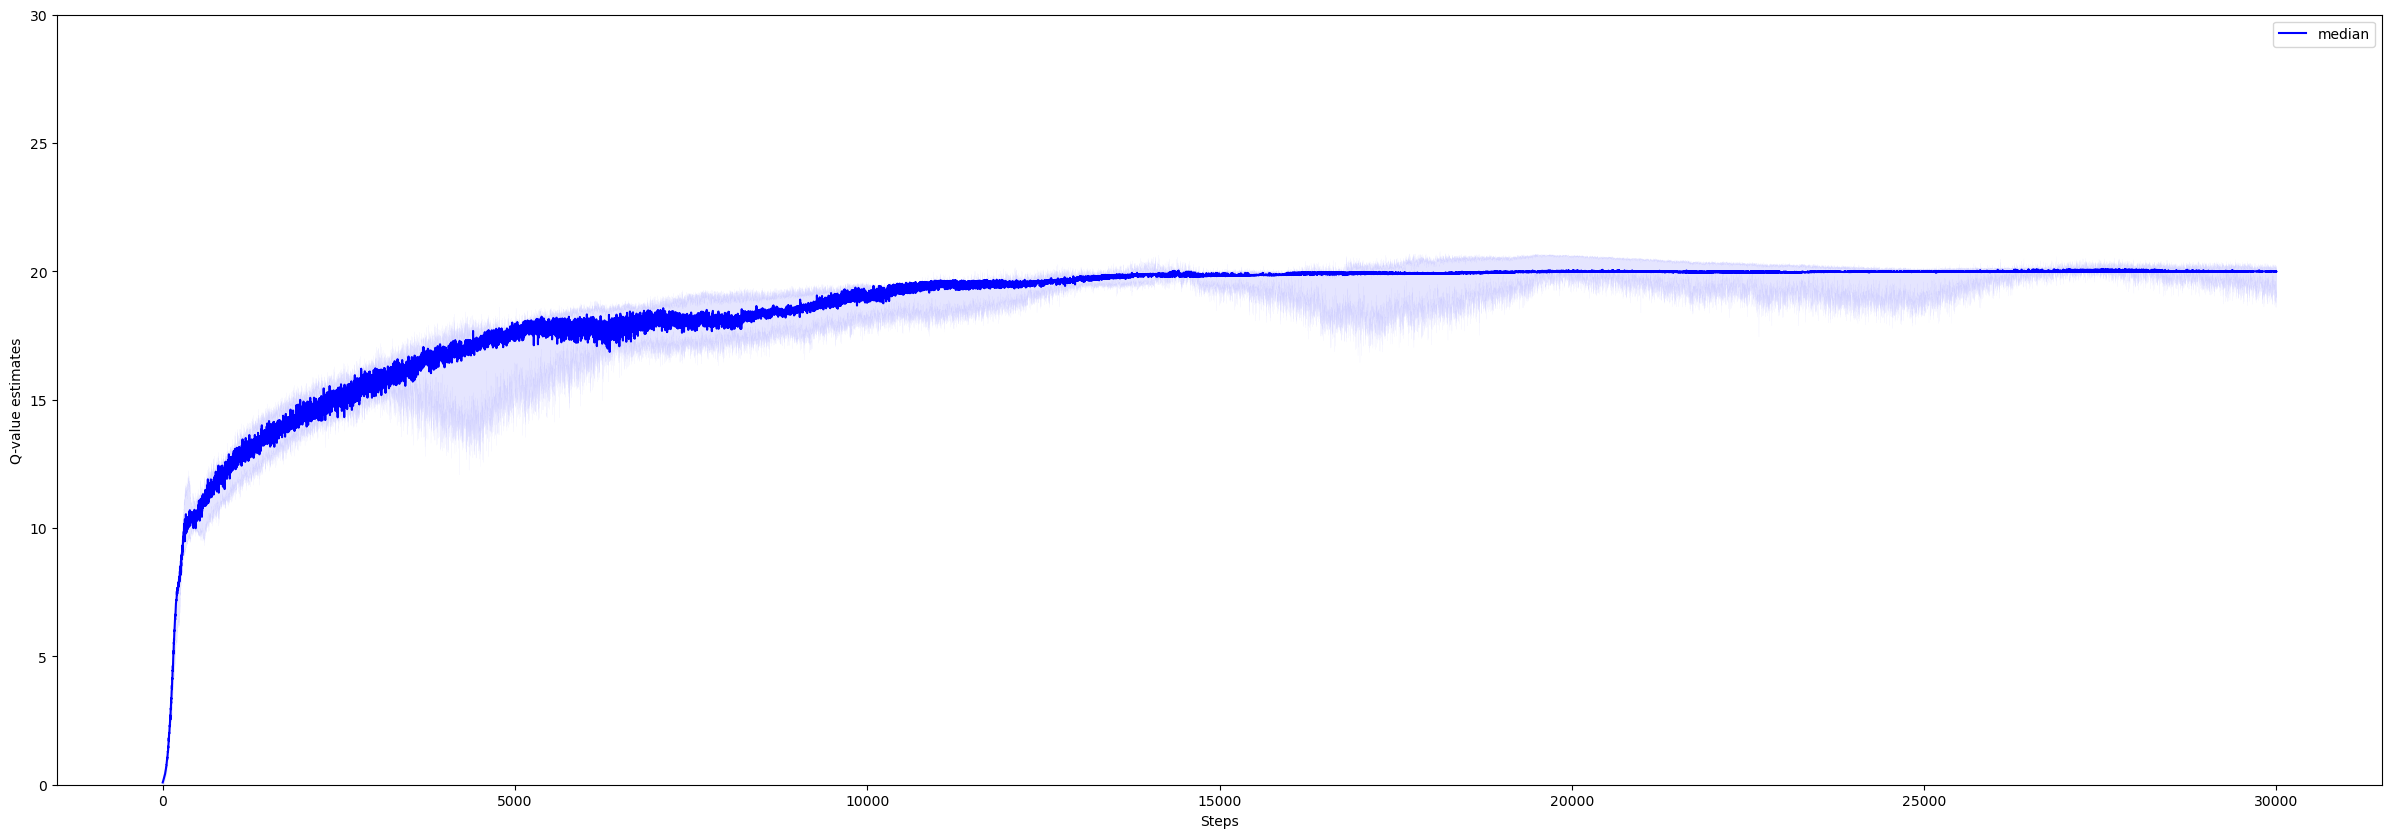

<Figure size 640x480 with 0 Axes>

In [79]:
fig, ax = plt.subplots(figsize=(30, 10))

plt.ylim((0,30))
plt.fill_between(tmp.index, tmp['l'],tmp['h'], color='blue', alpha=0.1, linewidth=0.1)
plt.plot(tmp['m'], color='blue', label='median')
plt.legend()
plt.ylabel('Q-value estimates')
plt.xlabel('Steps')
plt.show()
plt.savefig('./results/Q_value_estimeats_6_seed_values.png')